# Data Pre-processing


In [ ]:
from google.colab import files
uploaded = files.upload()
#upload the data extracted from Twitter

Saving TwitterAPI.csv to TwitterAPI.csv


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline 
#display output inline

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['Brexit', 'EU', 'UK', 'will']) #set our own stopwords into the stopwords dictionary

In [ ]:
#read csv file
df = pd.read_csv('TwitterAPI.csv', engine = 'python', encoding='utf-8', error_bad_lines=False)
df

,Unnamed: 0,tweets,user_id,time
0,0,RT @Danwhite1972: Festival of Brexit is on.\n\...,1.451113e+18,2021-10-21 09:09:52
1,1,"RT @nigel__w_: As a result of Brexit, the peop...",1.451113e+18,2021-10-21 09:09:47
2,2,@corkeysghost1 @RogerGoodcopy @Colinnotfirth @...,1.451113e+18,2021-10-21 09:09:46
3,3,RT @13sarahmurphy: Pig culling to continue unt...,1.451113e+18,2021-10-21 09:09:45
4,4,RT @NicholasTyrone: Nine of out ten people who...,1.451113e+18,2021-10-21 09:09:45
...,...,...,...,...
29996,29996,RT @Matthew_Wright: Just more lies from @Boris...,1.450825e+18,2021-10-20 14:01:54
29997,29997,RT @Iblogtoglasgow: In 2016 Weatherspoon’s Tim...,1.450825e+18,2021-10-20 14:01:53
29998,29998,"""Since Brexit, UK made tremendous progress unr...",1.450825e+18,2021-10-20 14:01:53
29999,29999,"""As a result of the bilateral trade negotiatio...",1.450825e+18,2021-10-20 14:01:49


In [ ]:
df = df.drop_duplicates(['tweets']) #remove duplicated rows
df = df.reset_index(drop=True) #reset the index number
df #show cleaned data

,Unnamed: 0,tweets,user_id,time
0,0,RT @Danwhite1972: Festival of Brexit is on.\n\...,1.451113e+18,2021-10-21 09:09:52
1,1,"RT @nigel__w_: As a result of Brexit, the peop...",1.451113e+18,2021-10-21 09:09:47
2,2,@corkeysghost1 @RogerGoodcopy @Colinnotfirth @...,1.451113e+18,2021-10-21 09:09:46
3,3,RT @13sarahmurphy: Pig culling to continue unt...,1.451113e+18,2021-10-21 09:09:45
4,4,RT @NicholasTyrone: Nine of out ten people who...,1.451113e+18,2021-10-21 09:09:45
...,...,...,...,...
11749,29989,"@NateGG5 @PrisonPlanet Yeah, being right next ...",1.450825e+18,2021-10-20 14:02:11
11750,29992,RT @STARBRIGHT164: @caroscot63 @jacquieb51 Bor...,1.450825e+18,2021-10-20 14:02:04
11751,29993,RT @GraemeTR: Worth listening to all three ses...,1.450825e+18,2021-10-20 14:02:04
11752,29998,"""Since Brexit, UK made tremendous progress unr...",1.450825e+18,2021-10-20 14:01:53


In [ ]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text) #remove person tags
  text = re.sub(r'#', '', text) #remove hashtags(#)
  text = re.sub(r'RT[\s]+', '', text) #remove 'RT' retweets capital word
  text = re.sub(r'https?:\/\/\S+', '', text) #remove unnecessary links
  text = re.sub(r'&amp', '', text) #remove '&' symbol
  text = re.sub(r'\n', '', text) #remove enter/space

  return text

df['tweets'] = df['tweets'].apply(cleanTxt)
df

,Unnamed: 0,tweets,user_id,time
0,0,: Festival of Brexit is on.There is going to b...,1.451113e+18,2021-10-21 09:09:52
1,1,"__w_: As a result of Brexit, the people of Sco...",1.451113e+18,2021-10-21 09:09:47
2,2,Make your mind up. Either Brexit is great...,1.451113e+18,2021-10-21 09:09:46
3,3,": Pig culling to continue until next month, sh...",1.451113e+18,2021-10-21 09:09:45
4,4,: Nine of out ten people who voted Remain in 2...,1.451113e+18,2021-10-21 09:09:45
...,...,...,...,...
11749,29989,"Yeah, being right next to England and having...",1.450825e+18,2021-10-20 14:02:11
11750,29992,: Boris's hard brexit vs I🏴󠁧󠁢󠁳󠁣󠁴󠁿 IndyRef2 S...,1.450825e+18,2021-10-20 14:02:04
11751,29993,: Worth listening to all three sessions if you...,1.450825e+18,2021-10-20 14:02:04
11752,29998,"""Since Brexit, UK made tremendous progress unr...",1.450825e+18,2021-10-20 14:01:53


# Sentiment Detection and Data Visualisation

In [ ]:
from textblob import TextBlob

In [ ]:
def getSubjectivity(text): #get subjectivity of words from TextBlob
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text): #get polarity of words from TextBlob
  return TextBlob(text).sentiment.polarity

# Create a new column in dataframe to keep subjectivity and polarity
df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df["tweets"].apply(getPolarity)

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [ ]:
df

,Unnamed: 0,tweets,user_id,time,Subjectivity,Polarity,Analysis
0,0,: Festival of Brexit is on.There is going to b...,1.451113e+18,2021-10-21 09:09:52,0.625000,0.500000,Positive
1,1,"__w_: As a result of Brexit, the people of Sco...",1.451113e+18,2021-10-21 09:09:47,0.000000,0.000000,Neutral
2,2,Make your mind up. Either Brexit is great...,1.451113e+18,2021-10-21 09:09:46,0.883333,0.200000,Positive
3,3,": Pig culling to continue until next month, sh...",1.451113e+18,2021-10-21 09:09:45,0.400000,-0.166667,Negative
4,4,: Nine of out ten people who voted Remain in 2...,1.451113e+18,2021-10-21 09:09:45,0.047917,0.008333,Positive
...,...,...,...,...,...,...,...
11749,29989,"Yeah, being right next to England and having...",1.450825e+18,2021-10-20 14:02:11,0.428571,0.095238,Positive
11750,29992,: Boris's hard brexit vs I🏴󠁧󠁢󠁳󠁣󠁴󠁿 IndyRef2 S...,1.450825e+18,2021-10-20 14:02:04,0.541667,-0.291667,Negative
11751,29993,: Worth listening to all three sessions if you...,1.450825e+18,2021-10-20 14:02:04,0.100000,0.300000,Positive
11752,29998,"""Since Brexit, UK made tremendous progress unr...",1.450825e+18,2021-10-20 14:01:53,0.675000,0.408333,Positive


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Histogram(x=df['Analysis'])]) #Plot a histogram based on Analysis

fig.update_layout(
    title_text='Full Text', # title of plot
    xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

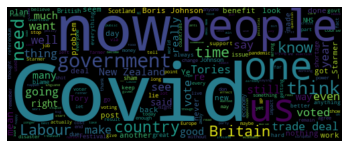

In [ ]:
allWords = ' '.join([twts for twts in df['tweets']])
wordCloud = WordCloud(width = 500, height = 200, random_state = 21, max_font_size = 119, stopwords=stopwords).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear') #interpolation is used to make the image appear smoother.
plt.axis('off')
plt.show()

In [ ]:
# Sort the dataframe according to their Polarity
sorteddf = df.sort_values("Polarity")

#Drop unnecessary column in sorted dataframe
sorteddf.drop(['Unnamed: 0', 'user_id', 'time', 'Subjectivity', 'Polarity'], axis='columns', inplace=True)

pd.set_option("display.max_colwidth", None) #To view the complete long text in a dataframe

In [ ]:
#To see negative tweets
sorteddf.loc[sorteddf['Analysis'] == 'Negative']

,tweets,Analysis
1201,: We have a winner for the worst idea since the Brexit referendum.,Negative
6545,Bloody Brexit! 🙈🤣,Negative
5074,Yes but they all seem to support Tories even though Brexit is awful and Covid Rising exponentially!,Negative
2837,She’s an evil harpie. The Brexit bike,Negative
1740,"I know, why have NZ even considered giving The racists in Brexit Britain this boost! Outrageous behaviour, the EU cannot standby and let this happen.",Negative
...,...,...
7021,": The UK is clearly being intentionally dismantled, prised open, stripped down and laid bare. Brexi…",Negative
4273,"_English The UK is clearly being intentionally dismantled, prised open, stripped down and laid bare. Brexit was designed with this in mind and is achieving its aims.",Negative
4664,"Oh Boris!! You berk. Those who voted cons are not interested in green agendas, they want immigrants out and brexit done. For those who are interested in green policies know not to vote Tory as you don’t give a shit and this is probably a scam to get your mates rich!",Negative
3906,"I earn enough especially after a huge payrise recently due to my employer realising it's cheaper to keep a valued employee than recruiting, mainly down to the workforce shrinking due to Brexit 😁, we are DINK's.",Negative


In [ ]:
#To see positive tweets
sorteddf.loc[sorteddf['Analysis'] == 'Positive']

,tweets,Analysis
3244,"coalition, Johnson needs to steer clear of deregulatory ideology of right-wing Brexit project. Yet, for opportunistic reasons that has become his power-base; one that Sunak is now carefully cultivating, even on existential issues like funding zero carbon emissions strategy.",Positive
4455,"_Mistake Yup, thankfully Brit consumers are already used to the increasing food prices since 2016. I reckon already up at least 15 to 20% so the choice will be fantastic if not much cheaper?",Positive
10844,"Tonton dans le garage fails to recognise Ireland as UK colony had no representation and its produce was plundered, even at the height of the Great HungerBeing in a community means compromises, which England and its elite spectacularly fails to recognise (thanks FPTP!)Brexit",Positive
2702,"Brexit was a huge dilemma for labour in 2019. And Jeremys campaign performance was poor, too. (in opposite to 2017). But yes the Starmer ref. option and Jeremys ""neutral"" attitude were equally unworkable.",Positive
4240,"3. ’s The Unknowers is an excellent and insightful book that draws on studies of ignorance. It offers a fresh look at political phenomena such as Brexit, Trump and Bolsonaro — including fake news and stigmatization of voters. Clickbait: Žižek hated it (just kidding).",Positive
...,...,...
9026,Your track record on voting doesn't seem very impressive. Look at how Brexit is turning out for ya. Anyone with a brain could have seen that one coming.,Positive
9161,When is Lab going to provide robust sustained opposition to the govt’s on Covid and Brexit. Banker Javid is happy to see cases rise to 100k a day ffs!! Let the bodies pile up they say. And the opposition? …….,Positive
5741,Let's see what you corbynista achievedBrexitTory hegemonyWorst election results in 70 yearsECHR ruling against the Labour PartyQuite impressive!,Positive
9362,"Business Commentator, Jurgen Maier has claimed that whereas one company has planned a giga-factory in the UK, 48 are planned across the EU. - Another Brexit win for us !",Positive


In [ ]:
#To see neutral tweets
sorteddf.loc[sorteddf['Analysis'] == 'Neutral']

,tweets,Analysis
5850,"Encouraging jobs, investment, and business???You’re still in the Brexit version of Narnia John.",Neutral
5793,"_woman64 _i_Rostorp _Refugee Night John, night Stars, Kit, Cat and all the HP crew😴",Neutral
9029,: _mad_murdock Reality is Brexit can only fa…,Neutral
11468,Loooool brexit fc,Neutral
1783,Brexit worked out well didn’t it.,Neutral
...,...,...
4602,"_Neverland I still haven’t got my Brexit unicorn, I knew I should have asked for a spitfire.",Neutral
4485,Anti Brexit kiwis must be conflicted,Neutral
9837,He also said:“Let’s get Brexit done and take back control of our fishing waters”,Neutral
4492,"_Mam: I still can't get over the way the government just says ""Turkey is doing it"" then suddenly everyone is like oh hell nahIt's…",Neutral


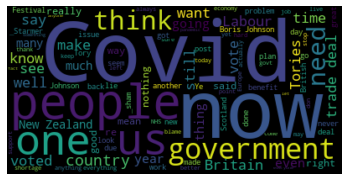

In [ ]:
neg_tweet = [] #create an array to save all negative tweets

sortedDF = df.sort_values(by=['Polarity']) #sort by polarity, then save negative tweets into the array
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    neg_tweet= sortedDF['tweets']

NegWords = ' '.join([twts for twts in neg_tweet]) #make a wordcloud from negative tweets
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black", stopwords=stopwords).generate(NegWords)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

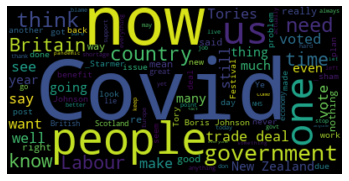

In [ ]:
pos_tweet = []

sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    pos_tweet= sortedDF['tweets']

PosWords = ' '.join([twts for twts in pos_tweet])
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black", stopwords=stopwords).generate(PosWords)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

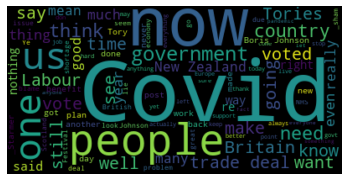

In [ ]:
neu_tweet = []

sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Neutral'):
    neu_tweet= sortedDF['tweets']

NeuWords = ' '.join([twts for twts in neu_tweet])
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black", stopwords=stopwords).generate(NeuWords)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Training Classification Model and its Preparation. 

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download('stopwords')

stopwords = set(stopwords)
stopwords.update(['Brexit', 'EU', 'UK', 'aren', 'brexit', 'couldn', 'didn', 'doesn', 
                  'don', 'eu', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 
                  're', 'shan', 'shouldn', 'uk', 've', 'wasn', 'weren', 'won', 'wouldn']) 
#set our own stopwords into the stopwords dictionary

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
vectorizer = TfidfVectorizer (max_features=2000, min_df=7, max_df=0.8, stop_words=stopwords) 
#stopwords are removed to not included in vectorizer
processed_features = vectorizer.fit_transform(df.tweets).toarray() #transformed text to array form 
processed_features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28380456, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
#To split the data into Train set and Test set
X_train, X_test, y_train, y_test = train_test_split(processed_features, df.Analysis, test_size=0.3, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report
from sklearn.model_selection import learning_curve

def confusionMatrix(pred): #Function that show performance of models
  print(classification_report(y_test,pred))
  print("Accuracy: ", accuracy_score(y_test, pred))
  print("Precision Score: ", precision_score(y_test, pred, average='micro'))
  print("Recall Score: ", recall_score(y_test, pred, average='micro'))
  print("F1 Score: ", f1_score(y_test, pred, average='micro'))
  plt.title("Confusion matrix")
  ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
  bottom, top = ax.get_ylim()
  ax.set_ylim(bottom + 0.5, top - 0.5)
  plt.yticks(rotation=0)
  plt.xlabel("Predicted Labels")
  plt.ylabel("Actual Labels")
  plt.show()

#Generate 3 plots: the test and training learning curve, the training samples vs fit times curve, the fit times vs score curve.
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# Multinomial Naive Bayes Result

In [ ]:
MNBmodel = MultinomialNB() 
MNBmodel.fit(X_train, y_train) #fit data into MNB model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

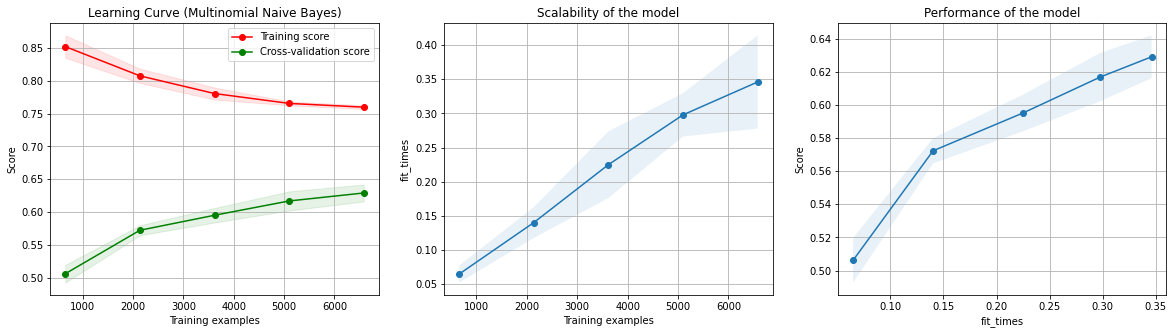

In [ ]:
#Plot learning curve of MNB models
plot_learning_curve(MultinomialNB(),"Learning Curve (Multinomial Naive Bayes)",X_train,y_train,n_jobs=4)
plt.show()

              precision    recall  f1-score   support

    Negative       0.77      0.46      0.58       922
     Neutral       0.73      0.53      0.61      1139
    Positive       0.59      0.87      0.70      1466

    accuracy                           0.65      3527
   macro avg       0.70      0.62      0.63      3527
weighted avg       0.68      0.65      0.64      3527

Accuracy:  0.6518287496455911
Precision Score:  0.6518287496455911
Recall Score:  0.6518287496455911
F1 Score:  0.6518287496455911


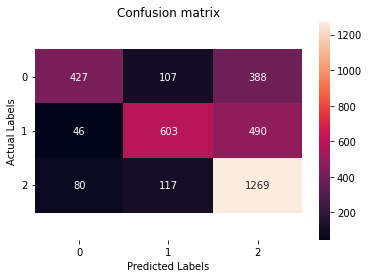

In [ ]:
# Evaluate performance of MNB trained models
MNBpredictions = MNBmodel.predict(X_test)
confusionMatrix(MNBpredictions) #average = micro

#Linear Support Vector Classifier Result

In [ ]:
svc = LinearSVC()
svc.fit(X_train, y_train) #fit data into LinearSVC model

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

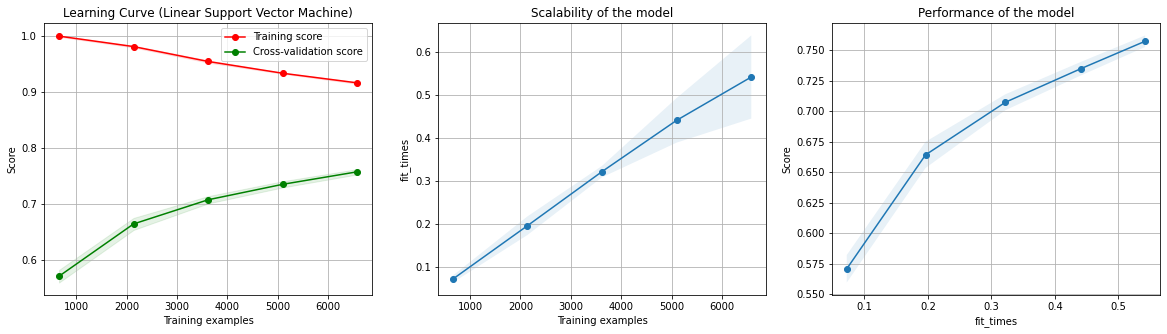

In [ ]:
#Plot Learning curve of LinearSVC model
plot_learning_curve(LinearSVC(),"Learning Curve (Linear Support Vector Machine)",X_train,y_train,n_jobs=4)
plt.show()

              precision    recall  f1-score   support

    Negative       0.76      0.69      0.73       922
     Neutral       0.77      0.83      0.80      1139
    Positive       0.80      0.80      0.80      1466

    accuracy                           0.78      3527
   macro avg       0.78      0.77      0.78      3527
weighted avg       0.78      0.78      0.78      3527

Accuracy:  0.7811170966827332
Precision Score:  0.7811170966827332
Recall Score:  0.7811170966827332
F1 Score:  0.7811170966827332


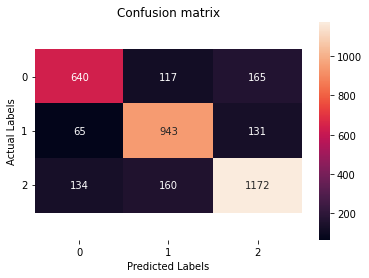

In [ ]:
#Evaluate performance of SVM trained model
SVCpredictions = svc.predict(X_test)
confusionMatrix(SVCpredictions) #average = micro